## Пример на регрессию

Данные об исследовании 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. Функция `sklearn.datasets.load_diabetes()` возвращает словарь, у которого в поле `data` записана матрица регрессоров (данные предварительно центрированы и нормированы), в поле `target` мера прогрессирования заболевания в течении года, а в поле `DESCR` можно прочитать подробнее о данных.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

### Загрузка данных

In [4]:
print(load_diabetes()['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

Данные -- матрица размера 442x10, где 442 -- количество пациентов, а 10 -- количество признаков (атрибутов). Строки матрицы соответствуют пациентам, столбцы -- признакам.

In [5]:
load_diabetes()['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

Целевая метка для каждого пациента.

In [6]:
load_diabetes()['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Сохраним эти данные в переменные и посмотрим на их размер

In [8]:
X, y = load_diabetes()['data'], load_diabetes()['target']
print(X.shape, y.shape)

(442, 10) (442,)


### Обучение моделей

Разобьем данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, так можно почитать спраку:

In [3]:
train_test_split?

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


#### 1. Линейная регрессия

Оценка вектора коэффициентов получается по методу наименьших квадратов, в котором решается задача оптимизации
$$\lVert Y - X\theta \rVert \to \max_\theta.$$

Объявим модель линейной регрессии и обучим ее по обучающей части данных.

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Оценка параметров по методу МНК

In [14]:
model.coef_

array([   61.05302064,  -212.33720864,   479.75261819,   348.11351646,
       -1072.13774689,   659.71827554,   291.17217003,   334.89936645,
         817.56885562,    53.07344661])

Оценка свободного коэффициента

In [15]:
model.intercept_

152.39594136749906

Предсказания по построенной модели

In [16]:
model.predict(X_test)

array([155.68845082, 166.21099024, 166.30043477, 135.42296935,
        87.30816302, 122.81298353, 151.55311659, 178.33220667,
       251.37720498,  66.54501958, 244.83312522, 190.87327751,
       160.534177  , 132.00498472, 236.67906394, 201.96004103,
       105.88735665, 128.49415493,  98.98147115,  70.81850313,
       153.19266205, 114.88837991, 261.2267163 , 166.9250259 ,
       220.87114944, 197.04037131,  79.69403516,  61.48402121,
       261.94947336, 206.92329025, 114.92546286, 190.32309519,
        74.54946089, 156.23966954,  58.38281996, 145.10128373,
        97.36396311,  57.96977678, 233.67420802, 216.61572477,
       205.87772858, 117.3728729 , 163.59675796, 167.19514461,
       186.52637514, 130.41328151, 114.91030484, 225.9947588 ,
       242.59372098,  78.38943673, 131.0126381 , 182.37317832,
       192.43965408, 184.59281373, 212.7641223 , 207.99852203,
       132.25207525, 210.1106882 , 110.71092311,  78.23732499,
       107.49926777,  86.25600225, 100.84506223, 124.98

Ошибка по метрики RMSE (корень из MSE)

In [20]:
mean_squared_error(y_test, model.predict(X_test)) ** 0.5

55.42741925380002

Ошибка по метрике MAE

In [22]:
mean_absolute_error(y_test, model.predict(X_test))

45.5055980646459

Реализуем метрику MAPE

In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

И посчитаем качество по ней

In [27]:
mean_absolute_percentage_error(y_test, model.predict(X_test))

41.42758089361674

График зависимости предсказания прогрессирования заболевания от нормированного индекса массы тела

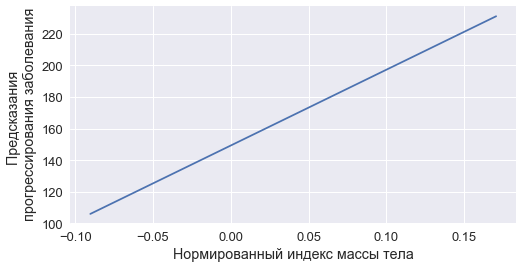

In [87]:
grid = np.tile(X_test.mean(axis=0), 100).reshape((100, -10))
grid[:, 2] = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)

preds = model.predict(grid)

plt.figure(figsize=(8, 4))
plt.plot(grid[:, 2], preds)
plt.xlabel('Нормированный индекс массы тела')
plt.ylabel('Предсказания \n прогрессирования заболевания');

#### 2. Ridge-регрессия

Оценка вектора коэффициентов получается решением следующей задачи
$$\lVert Y - X\theta \rVert + \alpha \lVert \theta \rVert^2 \to \max_\theta.$$

Объявим модель ridge-регрессии и обучим ее по обучающей части данных.

In [46]:
model_ridge = Ridge(alpha=.1)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Посчитаем предсказания и все метрики по ним

In [47]:
y_pred = model_ridge.predict(X_test)

mean_squared_error(y_test, y_pred) ** 0.5, \
mean_absolute_error(y_test, y_pred), \
mean_absolute_percentage_error(y_test, y_pred)

(55.22799020130614, 45.902112418434704, 42.49790063633614)

Посмотрим на оценку коэффициентов в простой линейной модели

In [48]:
model.coef_

array([   61.05302064,  -212.33720864,   479.75261819,   348.11351646,
       -1072.13774689,   659.71827554,   291.17217003,   334.89936645,
         817.56885562,    53.07344661])

Оценка коэффициентов в ridge-регрессии. Можно заметить, что почти все коэффициенты стали меньше по модулю. На это влияет регуляризационная добавка в задаче оптимизации.

In [49]:
model_ridge.coef_

array([  63.25070557, -172.41465934,  451.62130064,  313.71112791,
        -86.86514578,  -68.78965462, -160.61839173,  169.86293222,
        414.38700516,   74.66731794])

#### 3. Lasso-регрессия

Оценка вектора коэффициентов получается решением следующей задачи
$$\lVert Y - X\theta \rVert + \alpha \lVert \theta \rVert_1 \to \max_\theta,$$
где $\lVert \theta \rVert_1 = \left|\theta_1\right| + ... + \left|\theta_d\right|$

In [50]:
model_lasso = Lasso(alpha=.05)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Посчитаем предсказания и все метрики по ним

In [51]:
y_pred = model_lasso.predict(X_test)

mean_squared_error(y_test, y_pred) ** 0.5, \
mean_absolute_error(y_test, y_pred), \
mean_absolute_percentage_error(y_test, y_pred)

(54.638758605322494, 45.51099753398277, 42.02540313878397)